In [ ]:
import numpy as np
import time
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import pandas as pd
from sympy import *
import random

# Question 1
How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

## Answer
The multiplied matrix is of the shape (n,m). <br><br>
$$
\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1k} \\
a_{21} & a_{22} & \cdots & a_{2k} \\
\vdots & \vdots & \vdots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nk}
\end{bmatrix}
\times
\begin{bmatrix}
b_{11} & b_{12} & \cdots & b_{1m} \\
b_{21} & b_{22} & \cdots & b_{2m} \\
\vdots & \vdots & \vdots & \vdots \\
b_{k1} & b_{k2} & \cdots & b_{km}
\end{bmatrix}
=
\begin{bmatrix}
a_{11}b_{11} + a_{12}b_{21} + \cdots + a_{1k}b_{k1} & a_{11}b_{12} + a_{12}b_{22} + \cdots + a_{1k}b_{k2} & \cdots & a_{11}b_{1m} + a_{12}b_{2m} + \cdots + a_{1k}b_{km} \\
a_{21}b_{11} + a_{22}b_{21} + \cdots + a_{2k}b_{k1} & a_{21}b_{12} + a_{22}b_{22} + \cdots + a_{2k}b_{k2} & \cdots & a_{21}b_{1m} + a_{22}b_{2m} + \cdots + a_{2k}b_{km} \\
\vdots & \vdots & \vdots & \vdots \\
a_{n1}b_{11} + a_{n2}b_{21} + \cdots + a_{nk}b_{k1} & a_{n1}b_{12} + a_{n2}b_{22} + \cdots + a_{nk}b_{k2} & \cdots & a_{n1}b_{1m} + a_{n2}b_{2m} + \cdots + a_{nk}b_{km}
\end{bmatrix}
$$
<br>

Each element in the multiplied matrix is obtained by addition of element-wise multiplication a row of matrix <b>a</b> with a column of matrix <b>b</b>. Therefore, number of multiplications for a single element = size of row of matrix <b>a</b> = k <br>
Total no. of multiplications = k * Number of elements = <b>k * n *m</b><br>
Total no. of additions = k-1 * Number of elements = <b>(k-1) * n * m</b>

# Question 2
Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

Matrix multiplication using list of lists

In [ ]:
def matrix_multiplication_list(m1,m2):
    n,k1 = len(m1),len(m1[0])
    k2,m = len(m2), len(m2[0])
    if k1!=k2:
        return "Invalid dimensions"
    ans = [[0 for i in range(m)] for j in range(n)]
    for i in range(n):
        for j in range(m):
            for k in range(k1):
                ans[i][j] += m1[i][k]*m2[k][j]
    return ans

Matrix multiplication using numpy

In [ ]:
def matrix_multiplication_numpy(m1,m2):
    return np.dot(m1,m2)

Time comparison of both the approaches

In [ ]:
m1 = np.random.random(size=(1000,1000))
m2 = np.random.random(size=(1000,1000))

start = time.time()
# print(matrix_multiplication_list(m1,m2))
end = time.time()
list_time = end-start

start = time.time()
# print(matrix_multiplication_numpy(m1,m2))
end = time.time()
numpy_time = end-start

print(f'Time taken by list of lists method: {list_time}')
print(f'Time taken by numpy method: {numpy_time}')
if (numpy_time < list_time):
  print("Numpy multiplication is faster")
else:
  print("List of lists multiplication is faster")



Time taken by list of lists method: 2.9325485229492188e-05
Time taken by numpy method: 1.9788742065429688e-05
Numpy multiplication is faster


Numpy multiplies the matrix faster than using list of lists because numpy arrays are optimised for mathematical operations. They are performed in C language, which is a low-level language, hence they are done faster.

# Question 3
Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against <code>numpy.median</code> routine in terms of time?

Time complexity of finding median by this method is <i> O(n<sup>2</sup>)</i>

In [ ]:
def kth_smallest(arr,k):
  arr_=arr.copy()
  for _ in range(k + 1):
    min_ = float('inf')
    min_index = -1
    for i in range(len(arr_)):
      if arr_[i] < min_:
        min_ = arr_[i]
        min_index = i
    if min_index != -1:
      arr_[min_index] = float('inf')
  return min_

def calculate_median(arr):
  n=len(arr)
  if len(arr)%2!=0:
    return kth_smallest(arr,n//2)
  return (kth_smallest(arr,n//2-1)+kth_smallest(arr,n//2))/2

A better method could be sotring the array or using the quickselect algorithm both of which would have time complexity O(n log(n)).

In [ ]:
def calculate_median_sort(arr):
  arr_=arr.copy()
  arr_.sort()
  n=len(arr)
  if n%2==0:
    return (arr_[n//2]+arr_[n//2-1])/2
  else:
    return arr_[n//2]

def calculate_median_numpy(arr):
  return np.median(arr)

In [ ]:
arr = [np.random.randint(1, 100) for _ in range(10001)]

start=time.time()
print(f"Median calculated by looping method = {calculate_median(arr)}")
end=time.time()
n_loops_time = end-start

start=time.time()
print(f'Median calculated by sorting = {calculate_median_sort(arr)}')
end=time.time()
optimised_time = end-start

start=time.time()
print(f"Median calculated by np.median = {calculate_median_numpy(arr)}")
end=time.time()
numpy_time = end-start

print(f"Time taken by looping method:{n_loops_time:.6f}")
print(f"Time taken by sorting method:{optimised_time:.6f}")
print(f"Time taken by numpy.median: {numpy_time:.6f}")

Median calculated by looping method = 51
Median calculated by sorting = 51
Median calculated by np.median = 51.0
Time taken by looping method:3.193661
Time taken by sorting method:0.002446
Time taken by numpy.median: 0.000820


Median is calculated fastest by <code>np.median</code>, followed by <b>sorting</b> followed by <b>looping</b>.

# Question 4
What is the gradient of the following function with respect to x and y ?<br><br>
\begin{equation} x^2y + y^3sin(x) \end{equation}

The derivative of the function w.r.t x \begin{equation} 2xy + y^3cos(x)  \end{equation}
The derivative of the function w.r.t y \begin{equation} x^2 + 3y^2sin(x)  \end{equation}

# Question 5
Use <code>JAX</code> to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [ ]:
def f(x,y):
  return y*(x**2) + (y**3)*jnp.sin(x)

gradient = jax.grad(f, argnums=(0, 1))

def grad(x,y):
  df_dx = 2*x*y + (y**3)*np.cos(x)
  df_dy = x**2 + (3*(y**2))*np.sin(x)
  return df_dx, df_dy

In [ ]:
x_values = np.random.randint(1,10,size = 3)
y_values = np.random.randint(1,10,size = 3)

for i in range(3):
  x = float(x_values[i])
  y = float(y_values[i])
  jax_grad = gradient(x,y)
  analytical_grad = grad(x, y)
  print(f"Values used, (x,y) = ({x}, {y})")
  print(f"Gradient calculated by JAX = ({jax_grad[0]}, {jax_grad[1]})")
  print(f"Analytical gradient  = {analytical_grad}")

Values used, (x,y) = (2.0, 1.0)
Gradient calculated by JAX = (3.583853244781494, 6.72789192199707)
Analytical gradient  = (3.5838531634528574, 6.727892280477045)
Values used, (x,y) = (2.0, 6.0)
Gradient calculated by JAX = (-65.8877182006836, 102.20411682128906)
Analytical gradient  = (-65.88771669418276, 102.20412209717362)
Values used, (x,y) = (6.0, 8.0)
Gradient calculated by JAX = (587.607177734375, -17.64777374267578)
Analytical gradient  = (587.6071867649873, -17.647775654193765)


# Question 6
Use <code>sympy</code> to confirm that you obtain the same gradient analytically.



In [ ]:
x, y = symbols('x y')
print(diff((x**2)*y+(y**3)*sin(x),x))
print(diff((x**2)*y+(y**3)*sin(x),y))

2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


# Question 7
Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [ ]:
d = {
    2022:{
        "Branch1":{
            "student1":{"roll_no":1, "name":"name1", "marks":{
                "maths":100, "english":70
            }}, "student2":{"roll_no":2, "name":"name2", "marks":{
                "maths":100, "english":70
            }}
        }, "Branch2":{
            "student3":{"roll_no":3, "name":"name3", "marks":{
                "maths":100, "english":70
            }}, "student4":{"roll_no":4, "name":"name4", "marks":{
                "maths":100, "english":70
            }}
        }
    },2023:{
        "Branch1":{}, "Branch2":{}  #Data can be added similar to branch 2022
    },2024:{
        "Branch1":{}, "Branch2":{}
    },2025:{
        "Branch1":{}, "Branch2":{}
    }
}

In [ ]:
print(d)

{2022: {'Branch1': {'student1': {'roll_no': 1, 'name': 'name1', 'marks': {'maths': 100, 'english': 70}}, 'student2': {'roll_no': 2, 'name': 'name2', 'marks': {'maths': 100, 'english': 70}}}, 'Branch2': {'student3': {'roll_no': 3, 'name': 'name3', 'marks': {'maths': 100, 'english': 70}}, 'student4': {'roll_no': 4, 'name': 'name4', 'marks': {'maths': 100, 'english': 70}}}}, 2023: {'Branch1': {}, 'Branch2': {}}, 2024: {'Branch1': {}, 'Branch2': {}}, 2025: {'Branch1': {}, 'Branch2': {}}}


# Question 8
Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [ ]:
class Marks:
  def __init__(self,subject,marks):
    self.subject = subject
    self.marks = marks

class Student:
  def __init__(self,name,roll_no):
    self.name = name
    self.roll_no = roll_no
    self.marks = []

  def add_marks(self,subject,marks):
    marks = Marks(subject,marks)
    self.marks.append(marks)

class Branch:
  def __init__(self,name):
    self.name = name
    self.students = []

  def add_student(self,student):
    self.students.append(student)

class Year:
  def __init__(self,year):
    self.year = year
    self.branches = []

  def add_branch(self,branch):
    self.branches.append(branch)

In [ ]:
data = []
year_2022 = Year(2022)
year_2023 = Year(2023)
year_2024 = Year(2024)
year_2025 = Year(2025)

branch1_2022 = Branch("Branch1")
student1 = Student(1,"name1")
student1.add_marks("Maths",100)
student1.add_marks("English",70)
branch1_2022.add_student(student1)
student2 = Student(2,"name2")
student2.add_marks("Maths",100)
student2.add_marks("English",70)
branch1_2022.add_student(student2)

branch2_2022 = Branch("Branch2")
student3 = Student(3,"name3")
student3.add_marks("Maths",100)
student3.add_marks("English",70)
branch2_2022.add_student(student3)
student4 = Student(4,"name2")
student4.add_marks("Maths",100)
student4.add_marks("English",70)
branch2_2022.add_student(student4)

year_2022.add_branch(branch1_2022)
year_2022.add_branch(branch2_2022)

branch1_2023 = Branch("Branch1")
branch2_2023 = Branch("Branch2")

year_2023.add_branch(branch1_2023)
year_2023.add_branch(branch2_2023)

branch1_2024 = Branch("Branch1")
branch2_2024 = Branch("Branch2")

year_2024.add_branch(branch1_2024)
year_2024.add_branch(branch2_2024)

branch1_2025 = Branch("Branch1")
branch2_2025 = Branch("Branch2")

year_2025.add_branch(branch1_2025)
year_2025.add_branch(branch2_2025)

database = [year_2022,year_2023,year_2024,year_2025]

# Question 9
Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5

In [ ]:
x = np.arange(0.5,100.5,0.5)

In [ ]:
y_1 = x
y_2 = x**2
y_3 = (x**3)/100
y_4 = np.sin(x)
y_5 = np.sin(x)/x
y_6 = np.log(x)
y_7 = np.exp(x)

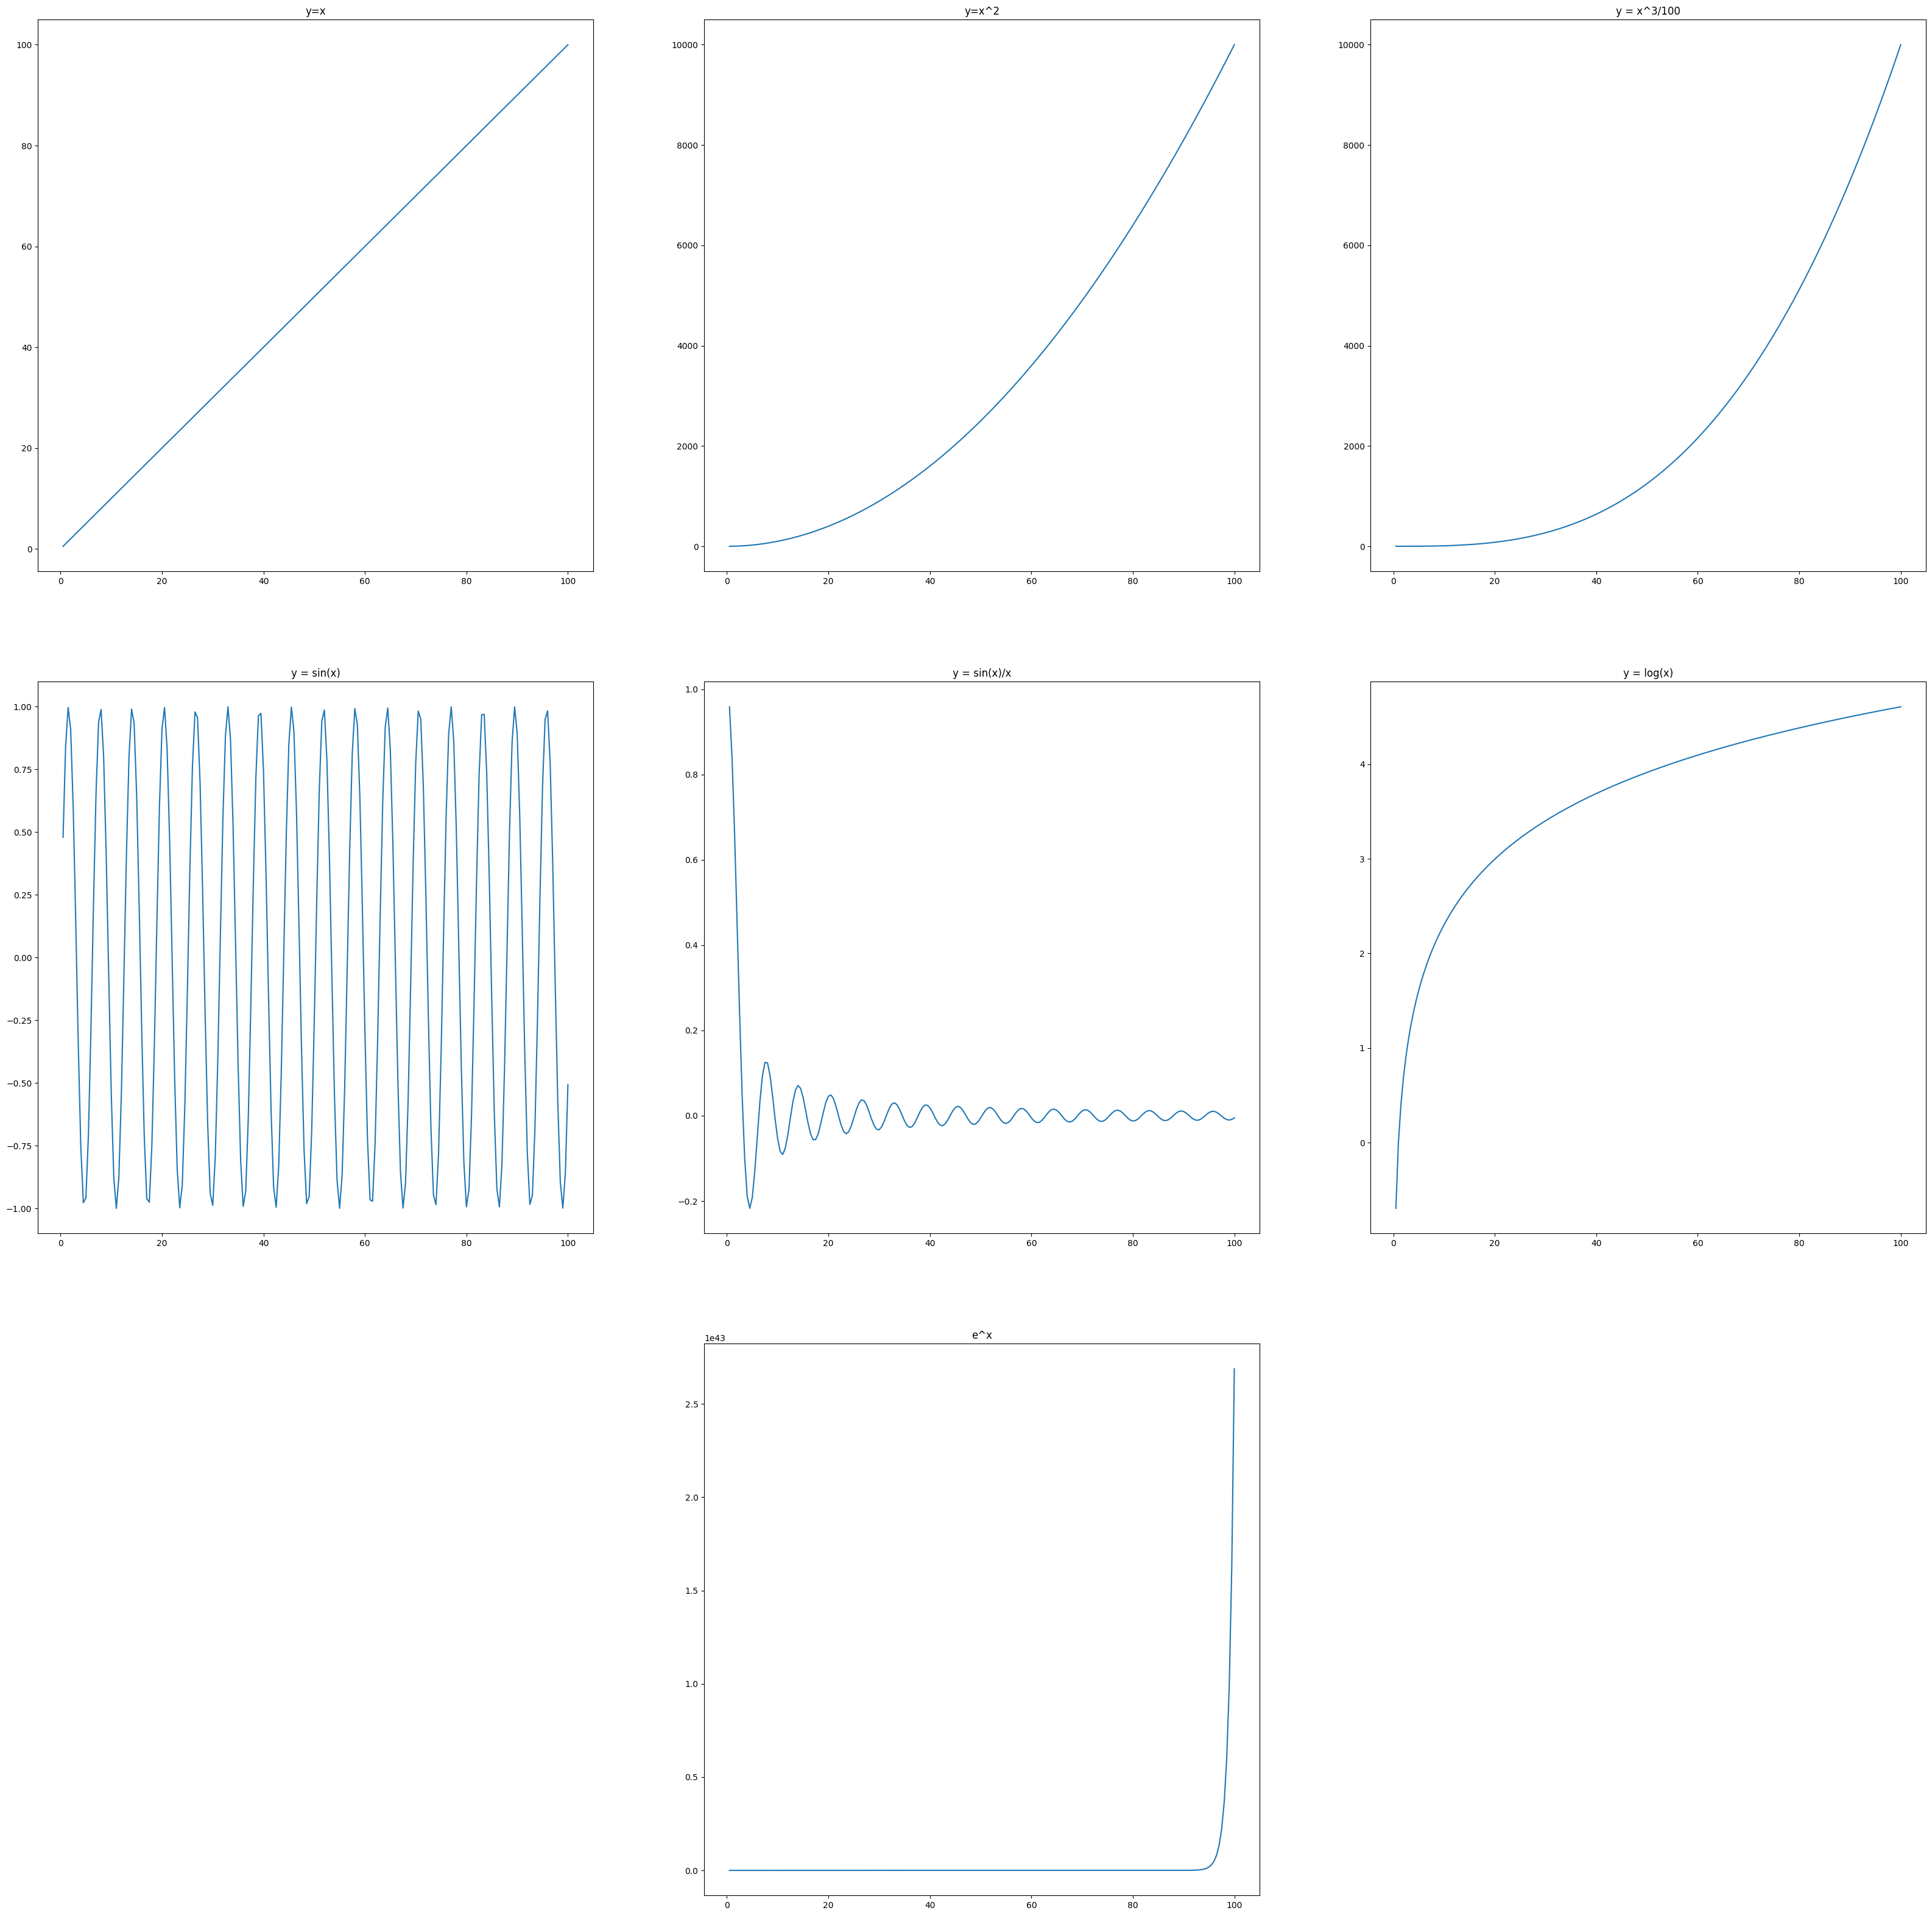

In [ ]:
plt.figure(figsize=(40,40))
plt.subplot(3,3,1)
plt.plot(x,y_1)
plt.title("y=x")
plt.subplot(3,3,2)
plt.plot(x,y_2)
plt.title("y=x^2")
plt.subplot(3,3,3)
plt.plot(x,y_3)
plt.title("y = x^3/100")
plt.subplot(3,3,4)
plt.plot(x,y_4)
plt.title("y = sin(x)")
plt.subplot(3,3,5)
plt.plot(x,y_5)
plt.title("y = sin(x)/x")
plt.subplot(3,3,6)
plt.plot(x,y_6)
plt.title("y = log(x)")
plt.subplot(3,3,8)
plt.plot(x,y_7)
plt.title("e^x")
plt.show()

# Question 10
Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [ ]:
m = np.random.uniform(1,2,size=(20,5))

In [ ]:
df = pd.DataFrame(m,columns=['a','b','c','d','e'])
print(df)

           a         b         c         d         e
0   1.582947  1.435666  1.239001  1.580692  1.502386
1   1.848175  1.338509  1.538959  1.206191  1.619835
2   1.419590  1.807380  1.911079  1.352437  1.480136
3   1.076874  1.069783  1.371088  1.287013  1.796715
4   1.547985  1.140038  1.647966  1.307131  1.626127
5   1.557455  1.503950  1.474657  1.178850  1.303550
6   1.367996  1.036511  1.881074  1.078591  1.264082
7   1.481508  1.676306  1.465115  1.137768  1.288094
8   1.577771  1.177534  1.790974  1.705610  1.219546
9   1.089498  1.873336  1.529429  1.922937  1.219445
10  1.955928  1.410025  1.589441  1.772455  1.723987
11  1.394684  1.556285  1.651303  1.593091  1.503047
12  1.945604  1.506922  1.147652  1.331995  1.173441
13  1.603502  1.999245  1.008130  1.450611  1.875115
14  1.904722  1.684531  1.217597  1.836548  1.343235
15  1.558760  1.315052  1.585930  1.221581  1.186574
16  1.443702  1.891960  1.668615  1.820218  1.132434
17  1.920305  1.436525  1.867192  1.576784  1.

In [ ]:
std_ = df.std()
col = std_.idxmax()
mean_ = df.mean(axis=1)
row = mean_.idxmin()
print(f"Column with highest standard deviation is column {col}")
print(f"Row with lowest mean is row {row}")

Column with highest standard deviation is column b
Row with lowest mean is row 18


# Question 11
Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [ ]:
df['f']=df.sum(axis=1)

In [ ]:
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')


In [ ]:
print(f"Number of rows where value in column g is LT8 is {len(df[df['g'] == 'LT8'])}")
lt8 = df[df['g']=='LT8']['f'].std()
gt8 = df[df['g']=='GT8']['f'].std()
print(f"Standard deviation of column 'f' for rows with 'LT8' = {lt8}")
print(f"Standard deviation of column 'f' for rows with 'GT8' = {gt8}")

Number of rows where value in column g is LT8 is 18
Standard deviation of column 'f' for rows with 'LT8' = 0.5713203150548833
Standard deviation of column 'f' for rows with 'GT8' = 0.02992781280594151


# Question 12
Write a small piece of code to explain broadcasting in numpy.

In [ ]:
a = np.array([1,4,7])
b=np.array([[1],[2],[3]])

print(f"Shape of array a is {a.shape}")
print(f"Shape of array b is {b.shape}")

sum = a+b
print("Sum = ",sum)

print(f"Shape of sum is {sum.shape}")

Shape of array a is (3,)
Shape of array b is (3, 1)
Sum =  [[ 2  5  8]
 [ 3  6  9]
 [ 4  7 10]]
Shape of sum is (3, 3)


The shape of matrix <b>a</b> is (3,) and shape of matrix <b>b</b> is (3,1). So, for adding the matrices, the matrix a is stretched along the rows to make 2 copies and the matrix b is stretched along the column to equalise both their shapes to (3,3) for adding. This is called broadcasting.
<br><br>
Array 'a' after broadcast:
\begin{bmatrix}
1 & 4 & 7  \\
1 & 4 & 7 \\
1 & 4 & 7
\end{bmatrix}

Array 'b' after broadcast:
\begin{bmatrix}
1 & 1 & 1  \\
2 & 2 & 2 \\
3 & 3 & 3
\end{bmatrix}


# Question 13
Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [ ]:
def argmin(arr):
  min = np.inf
  index=None
  for i in range(len(arr)):
    if arr[i]<min:
      min=arr[i]
      index = i
  return index

def argmin_numpy(arr):
  return np.argmin(arr)

In [ ]:
arr = np.random.random(20)
print(f"Array used = {arr}")
print(f"Argmin calculated by function = {argmin(arr)}")
print(f"Argmin calculated by np.argmin = {argmin_numpy(arr)}")

Array used = [0.1372587  0.56469606 0.41821438 0.59658071 0.04956021 0.54653267
 0.47636597 0.59911466 0.91982396 0.72454018 0.97165322 0.10731888
 0.07747699 0.23083988 0.96934752 0.44400349 0.15154889 0.45179942
 0.8755817  0.23113452]
Argmin calculated by function = 4
Argmin calculated by np.argmin = 4
